In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [ ]:
# reading dataset
df = pd.read_csv('/content/height-weight.csv')

df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 496.0 bytes


In [ ]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


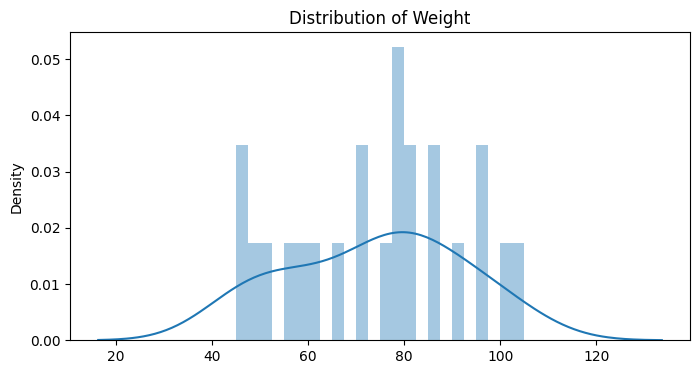

In [ ]:
# different distributions and scatter plot

plt.figure(figsize=(8,4))

sns.distplot(x = df['Weight'], kde='True', bins = 24)
plt.title('Distribution of Weight')
plt.show()







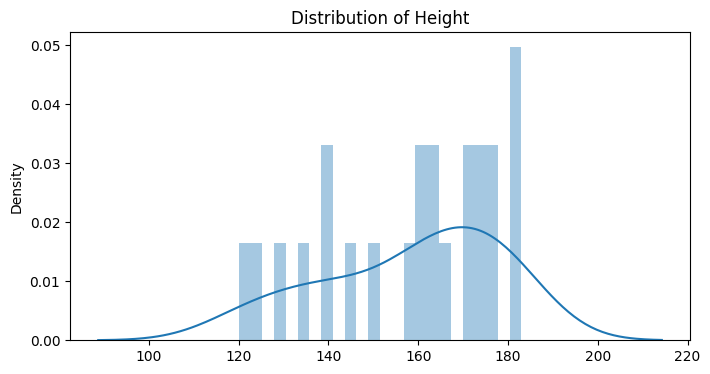

In [ ]:
plt.figure(figsize=(8,4))
sns.distplot(x = df['Height'], kde='True', bins = 24)
plt.title('Distribution of Height')
plt.show()

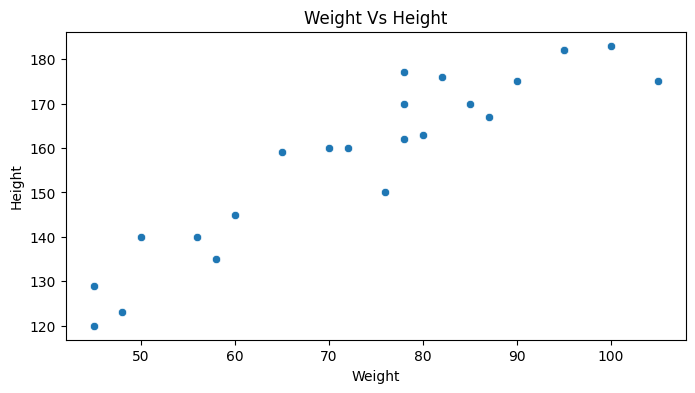


The correlation between Weight and Height = 0.9311418034329901


In [ ]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=df, x='Weight', y='Height')
plt.title('Weight Vs Height')
plt.show()
corr = df['Weight'].corr(df['Height'])
print(f'\nThe correlation between Weight and Height = {corr}')

**Insight** : Since Weight and Height are highly correlated of 0.93, they follow linear regression properties

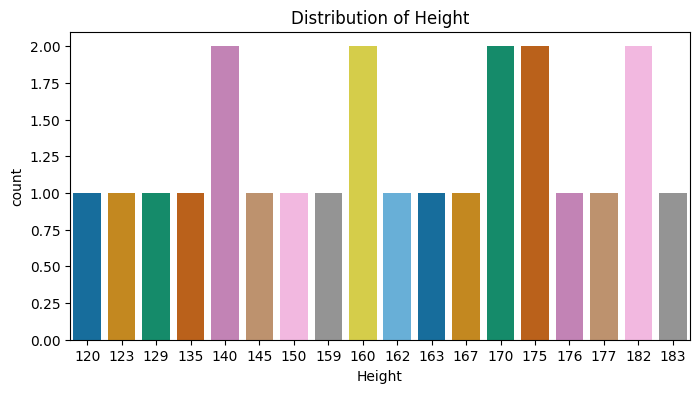

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x = df['Height'], palette='colorblind')
plt.title('Distribution of Height')
plt.show()

In [ ]:
# shorcut to correlation

df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


<Axes: ylabel='Weight'>

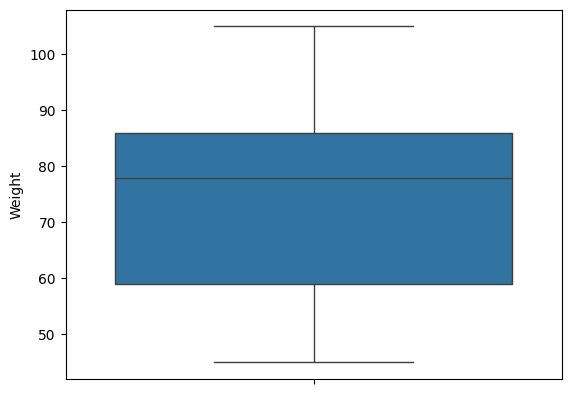

In [ ]:
# let's see outliers

sns.boxplot(data=df, y = 'Weight')

<Axes: ylabel='Height'>

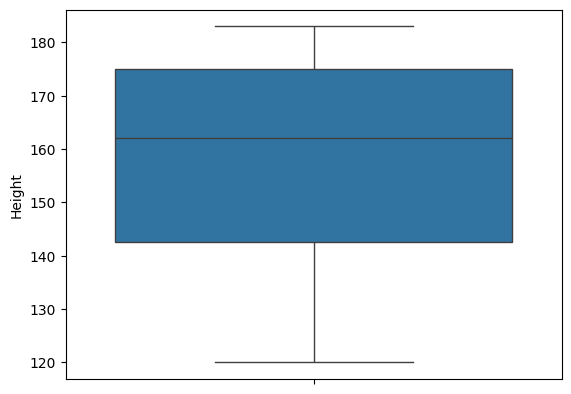

In [ ]:
sns.boxplot(data=df, y = 'Height')

In [ ]:
# dependent and independent feature

X = df[['Weight']] ## independent features always has to be a dataframe not sereis so i used 2 square braces for "Weight"
y = df['Height'] # output feature can be one dimension array or series so i used only 1 sqare braces


In [ ]:
# Train Test Split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
X_train.shape

(17, 1)

In [ ]:
X_test.shape

(6, 1)

In [ ]:
y_train.shape

(17,)

In [ ]:
y_test.shape

(6,)

In [ ]:
# Standardization

from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train) # we apply standardization only in traning data because gradient descent in Linear Reg, not in test data

In [ ]:
X_test=scaler.transform(X_test) # in test data,i used scaler.transform only, not fit_transform because scaler.transform use the same mean and standard deviation of train data, which prevents data leaking


In [ ]:
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [ ]:
# apply simple linear regression

from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression(n_jobs=-1)

In [ ]:
lr.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [ ]:
print("Coefficient or Slope: ", lr.coef_)
print("Y intercept: ", lr.intercept_)

Coefficient or Slope:  [17.2982057]
Y intercept:  156.47058823529412


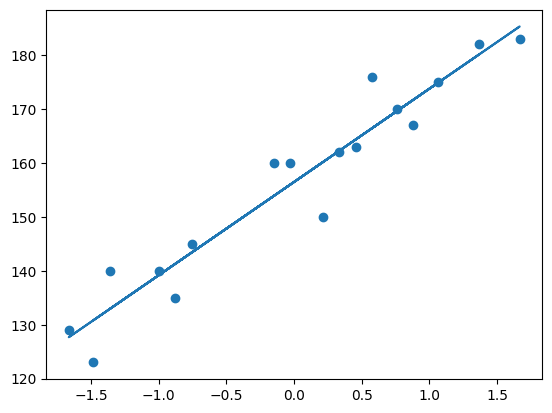

In [ ]:
# plot best fit line training data

plt.scatter(X_train,y_train)
plt.plot(X_train,lr.predict(X_train))

In [ ]:
#prediction for test data
y_predict = lr.predict(X_test)

In [ ]:
# preformace Metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
mse = mean_squared_error(y_test,y_predict)
mae = mean_absolute_error(y_test,y_predict)
print(mse)
print(mae)

114.84069295228699
9.66512588679501


In [ ]:
from sklearn.metrics import r2_score

accuracy = r2_score(y_test,y_predict)

accuracy

0.7360826717981276

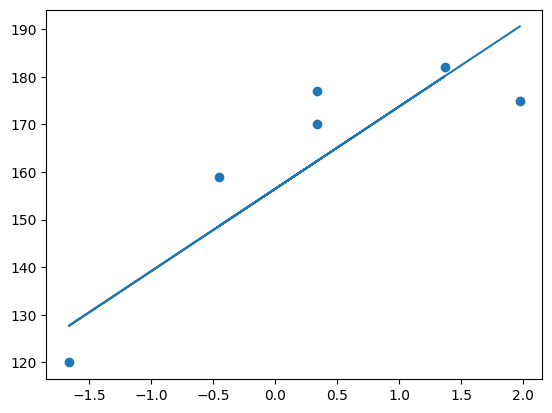

In [ ]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_predict)

In [ ]:
# prediction for new data

lr.predict(scaler.transform([[80]]))

array([164.36084726])